  # TIP8311 - Reconhecimento de Padrões - 1o. Trabalho Computacional – 06/12/2021

  - Programa de Pós-Graduação em Engenharia de Teleinformática (PGPETI)
  - Universidade Federal do Ceará (UFC), Centro de Tecnologia, Campus do Pici
  - Responsável: Prof. Guilherme de Alencar Barreto
  - Aluno: Rubem Vasconcelos Pacelli; matrícula: 519024


  ---
  **A brief comment about the data**: This dataset consists of a collection of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number.  There were 17 pulse numbers for the Goose Bay system.  Instances in this database are described by two attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

  **Key features**:
  - Number of Attributes: 34
  - Number of Instances: 351
  - The 35th attribute is either "good" or "bad" according to the definition summarized above.

  ---
  ### Question 1

  - Estimar a matriz de covariância GLOBAL (i.e. sem considerar os rótulos das classes) para o referido conjunto de dados usando o método descrito na `Eq. (100)`, usando as `Eqs. (101), (102) e (104)` para estimar a matriz de correlação.
  - Comparar com o resultado produzido pelo comando COV nativo do Octave/Matlab ou de outra linguagem de programação de sua preferência.

  #### Solution

  Downloading the file

In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
from numpy.linalg import norm, matrix_rank
import os.path
import matlab.engine
from scipy.io import loadmat
import time
import matplotlib.pyplot as plt

data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"

if not os.path.isfile("data.csv"):
    urlretrieve(data_url, "data.csv")


  The downloaded file is a `.csv` files with the following values (the last column is the "good" and "bad" classifier):

In [2]:
df = pd.read_csv (r'./data.csv')
df.head()


,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


  Estimating the covariance matrix using the `Eq.(100)`.

  The covariance matrix of a vector of random variables, $\mathbf{x} \in \mathbb{R}^p$, is defined as the second-order central moments of its components, that is

  $\mathbf{C}_i = \begin{bmatrix}
  E[(x_1 - m_1)^2]  & E[(x_1 - m_1)(x_2 - m_2)] & \cdots & E[(x_1 - m_1)(x_p - m_p)] \\
  E[(x_2 - m_2)(x_1 - m_1)] & E[(x_2 - m_2)^2]  & \cdots & E[(x_2 - m_2)(x_p - m_p)] \\
  \cdot    & \cdot    & \ddots & \vdots \\
  E[(x_p - m_p)(x_1 - m_1)] & E[(x_p - m_p)(x_2 - m_2)] & \cdots & E[(x_p - m_p)^2]
  \end{bmatrix},$

  where $x_k$ is the $k$-th element of the vector $\mathbf{x}$, $E[x_k]\triangleq m_k$ denotes the expected value of the random variable $x_k$, and $i\in \left\{1, 2, \cdots, C\right\}$ is the $i$-th class in which the covariance matrix is estimated.

  Note that the main diagonal of $\mathbf{C}_i$ is the variance of $x_k$, hereafter denoted as $\sigma_k^2$. The elements outside of the main diagonal are the covariance, which can be written as
  $$E[(x_k - m_k)(x_l - m_l)] \triangleq \sigma_{kl} = \sigma_{k}\sigma_{l}\rho_{kl}$$

  where the last equation come from the correlation coefficient ($\rho_{kl}$) definition.

  Hence, the covariance matrix can be rewritten as

  $\mathbf{C}_i = \begin{bmatrix}
  \sigma_1^2  & \sigma_{1}\sigma_{2}\rho_{12} & \cdots & \sigma_{1}\sigma_{p}\rho_{1p} \\
  \sigma_{2}\sigma_{1}\rho_{21} & \sigma_2^2  & \cdots & \sigma_{2}\sigma_{p}\rho_{2p} \\
  \cdot    & \cdot    & \ddots & \vdots \\
  \sigma_{p}\sigma_{1}\rho_{p1} & \sigma_{p}\sigma_{2}\rho_{p2} & \cdots & \sigma_p^2
  \end{bmatrix},$

  Using the matrix notation, $\mathbf{C}_i$ can be written as
  \begin{align}
  \mathbf{C}_i & = E\left[(\mathbf{x} - \mathbf{m})(\mathbf{x} - \mathbf{m})^\mathsf{T}\right] \\
  & = E\left[\mathbf{x}\mathbf{x}^\mathsf{T} - \mathbf{x}\mathbf{m}^\mathsf{T} - \mathbf{m}\mathbf{x}^\mathsf{T} + \mathbf{m}\mathbf{m}^\mathsf{T}\right] \\
  & = E\left[\mathbf{x}\mathbf{x}^\mathsf{T}\right] - E\left[\mathbf{x}\right]\mathbf{m}^\mathsf{T} - \mathbf{m} E\left[\mathbf{x}\right]^\mathsf{T} + \mathbf{m}\mathbf{m}^\mathsf{T} \\
  & = \mathbf{R}_\mathbf{x} - \mathbf{m}\mathbf{m}^\mathsf{T},
  \end{align}

  where $\mathbf{R}_\mathbf{x}$ and $\mathbf{m}$ are the correlation matrix and the mean vector of $\mathbf{x}$, respectively.

  Using a set of $N$ realizations, $\left\{\mathbf{x}(1), \mathbf{x}(2), \cdots, \mathbf{x}(N)\right\}$, the estimator of $\mathbf{R}_\mathbf{x}$ can be calculated as
  \begin{align}
  \mathbf{\hat{R}}_\mathbf{x} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}(n)\mathbf{x}^\mathsf{T}(n)
  \end{align}

In [3]:
X = df.iloc[:,:-1].to_numpy() # matrix of all realizations of the vector x (discart the last column)
N = X.shape[1] # number of realizations
def eq101(X):
    R_hat101 = 0
    N = X.shape[1] # number of realizations

    for n in range(N):
        R_hat101 = R_hat101 + np.outer(X[:,n],X[:,n])
    return R_hat101/N


  The estimation of the autocorrelation matrix can be computed faster using a matrix notation of all realization of the vector $\mathbf{x}$:

  \begin{align}
  \mathbf{X} = \left\{\mathbf{x}(1)\mid \mathbf{x}(2)\mid \cdots\mid \mathbf{x}(N) \right\}
  \end{align}
  The estimation of the correlation matrix is simply given by
  \begin{align}
  \mathbf{\hat{R}}_\mathbf{x} = \frac{1}{N}\mathbf{X}\mathbf{X}^\mathsf{T}
  \end{align}

In [4]:
def eq102(X):
    N = X.shape[1] # number of realizations
    return np.matmul(X, X.transpose())/N


  Instead of using a batch approach to compute the correlation matrix, it is possible to make it recursively. For the $n$-th realization of the vector $\mathbf{x}$, the matrix $\mathbf{\hat{R}}_\mathbf{x}(n)$ is updated to:
  \begin{align}
  \mathbf{\hat{R}}_\mathbf{x}(n) = \left(\frac{n-1}{n}\right)\mathbf{\hat{R}}_\mathbf{x}(n-1) + \frac{1}{n}\mathbf{x}(n)\mathbf{x}^\mathsf{T}(n)
  \end{align}
  where $\mathbf{\hat{R}}_\mathbf{x}(1) \triangleq \mathbf{I}_N$.

In [5]:
def eq104(X):
    R_hat104 = np.identity(X.shape[0])
    for n in range(N): # go from 0 up to N-1
        R_hat104 = R_hat104*n/(n+1) + np.outer(X[:,n], X[:,n])/(n+1)
    return R_hat104


  The estimation of the mean vector is given by
  $$\mathbf{\hat{m}} = \frac{1}{N} \sum_{n=1}^{N} \mathbf{x}(n)$$

In [6]:
m_hat = np.sum(X,1)/N


  For each of the correlation matrices estimated in this exercise, we compute a covariance matrix using the following formula
  $$\mathbf{\hat{C}}_\mathbf{x} = \mathbf{\hat{R}}_\mathbf{x} - \mathbf{\hat{m}}\mathbf{\hat{m}}^\mathsf{T}$$

In [7]:
C_hat101 = eq101(X) - np.outer(m_hat,m_hat) # Eq.(101)
C_hat102 = eq102(X) - np.outer(m_hat,m_hat) # Eq.(102)
C_hat104 = eq104(X) - np.outer(m_hat,m_hat) # Eq.(104)


  ### Performance comparasions
  The following code compares these covariance matrices computed in `Python` with the built-in covariance estimation from `Matlab` (using the `cov` command). The performance is assessed in terms of the difference between the estimated matrix in `Python` and the output matrix from the built-in command in `Matlab`. Then, it is computed the Frobenius norm of each error matrix

In [8]:
X_matlab = matlab.double(X.tolist())

eng = matlab.engine.start_matlab()
C_matlab = np.array(eng.cov(eng.ctranspose(X_matlab),1)) # the command cov(X',1) from matlab
eng.exit()


In [9]:
E101 = C_hat101 - C_matlab # Eq.(101)
E102 = C_hat102 - C_matlab # Eq.(102)
E104 = C_hat104 - C_matlab # Eq.(104)

# Frobenius norm
list(map(norm, (E101, E102, E104)))



[1.654769249278363e-14, 1.6504732247530623e-14, 2.2449668143292448e-14]


 ---
 ### Question 2
 Comparar os métodos implementados no Item 1 com o comando COV nativo do Octave/Matlab ou de outra linguagem de programação que melhor lhe convier em termos de tempo de processamento. No Matlab/Octave usar os comandos tic/toc.


 It is used built-in commands from `Matlab` and `Python` as benchmark performance. To enhance the reliability of the actual performance reached in Matlab, it was used a `.m` file in the own Matlab IDE. Then, the result of the elapsed time was imported to the Python code to make comparisons.

/home/tapyu/.local/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/home/tapyu/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


<BarContainer object of 5 artists>

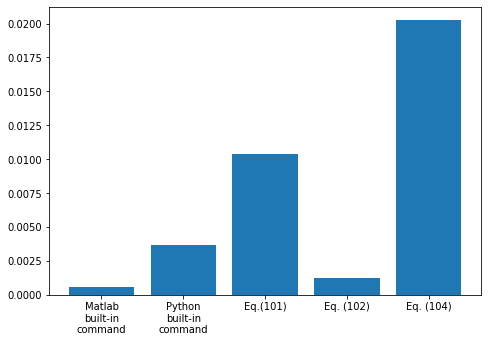

In [10]:
# calling the tictoc.m script from Python increases the time computation, run the script from Matlab IDE instead
# if not os.path.isfile('tictoc.mat'):
#     eng = matlab.engine.start_matlab()
#     eng.tictoc(nargout=0)
#     eng.quit()

# time elapse - matlab built-in command
time_matlab = loadmat('tictoc.mat')

# time elapse - python built-in command
start = time.perf_counter()
np.cov(X)
end = time.perf_counter()
time_python = end - start

# time elapse - Eq.(101)
start = time.perf_counter()
eq101(X)
end = time.perf_counter()
time_eq101 = end - start

# time elapse - Eq.(102)
start = time.perf_counter()
eq102(X)
end = time.perf_counter()
time_eq102 = end - start

# time elapse - Eq.(104)
start = time.perf_counter()
eq104(X)
end = time.perf_counter()
time_eq104 = end - start

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(["Matlab\nbuilt-in\ncommand", "Python\nbuilt-in\ncommand", "Eq.(101)", "Eq. (102)", "Eq. (104)"], [time_matlab['elapsed_time'], time_python, time_eq101, time_eq102, time_eq104])


 #### Conclusions

 - With regard to time consumption, `Matlab` built-in command outperforms the `Python` built-in command.
 - `Eq.(102)` (computation with matrix notation) has the best performance among the other approaches.
 - `Eq.(104)` had the worst performance. However, this method allows computing the covariance matrix in an online manner.

 ---
 ### Question 3
 -  Escolher um dos métodos implementados no Item 1 e estimar as matrizes de covariância de cada classe


In [12]:
Xb = df.loc[df.iloc[:,-1] == 'b'].iloc[:,:-1].to_numpy()
Xg = df.loc[df.iloc[:,-1] == 'g'].iloc[:,:-1].to_numpy()

C_hatb = np.cov(Xb)
C_hatg = np.cov(Xg)


 ### Question 4
 - Avaliar a invertibilidade da matriz de covariância global e das de cada classe (matrizes de covariância locais) através do seu posto e do seu número de condicionamento.
 - A que conclusões você pode chegar quanto a este quesito de invertibilidade das matrizes locais em relação à matriz de covariância global?

In [13]:
r = matrix_rank(C_hat102)
rb = matrix_rank(C_hatb)
rg = matrix_rank(C_hatg)

r, rb, rg


(33, 33, 33)

#### Conclusions

  - It is possible to notice that $r = rank(\mathbf{C})=rank(\mathbf{X})$, for both global and local dataset variables.
  - All covariances matrices are rank-deficient, since $r \leq m$, where $m$ is the dimension of the covariance matrix. For rank-deficient and square matrices, it is not possible to invert it as there is a linear dependency on the columns vectors. Such dependency decreases the dimensionality of the column space. That is, if $\mathbf{C}\mathbf{x} = \mathbf{b}$, where $\mathbf{C}\in \mathbb{R}^{m\times m}$ is a rank-deficient matrix, the column space, which is defined by $C(\mathbf{C}) = \left\{\mathbf{b}\in \mathbb{R}^m \mid \mathbf{C}\mathbf{x} = \mathbf{b}, \forall \mathbf{x}\in \mathbb{R}^m\right\}$, does no cover all $\mathbb{R}^m$. Therefore, once applied the linear transformation $\mathbf{C}$ on the input vector $\mathbf{x}$, it is not possible to undo the transformation perfectly, in other words, $\nexists\;\mathbf{C}^{-1}$.